In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
from scipy.ndimage import median_filter
import sys
import os
import struct
import pywt

sys.path.append(os.path.join(os.getcwd(), 'EC'))
import constants
import Func_read_data
import Func_despike_data
import sensor_info
import Func_DR
import Func_MRFD

importlib.reload(Func_read_data)
importlib.reload(Func_despike_data)
importlib.reload(constants)
importlib.reload(sensor_info)
importlib.reload(Func_DR)
importlib.reload(Func_MRFD)

from Func_read_data import *
from constants import *
from Func_despike_data import *
from sensor_info import *
from Func_MRFD import *
from Func_DR import *

In [45]:
folder='/run/user/72637/gvfs/smb-share:server=memobi.wsl.ch,share=pub/Turbulence/PEA/Season_2024-2025/DATA/MET/converted/'
folder='/home/engbers/Documents/PhD/EC_data_convert/converted/'
sensor='SFC'
start='2024-01-01 00:00'
end='2025-03-01 00:00'

"""GET SENSOR INFO"""
plim, calibration_coefficients, heights = get_sensor_info(sensor)
"""READ FAST AND SLOW DATA from folder"""
# fastdata=read_data(folder, 'fast', sensor, start, end)

slowdata=read_data(folder, 'slow', sensor, start, end, plot_data=False)



TOA5_STN1OneMin_771.dat
TOA5_STN1OneMin_718.dat
TOA5_STN1OneMin_564.dat
TOA5_STN1OneMin_481.dat
TOA5_STN1OneMin_764.dat
TOA5_STN1OneMin_745.dat
TOA5_STN1OneMin_749.dat
TOA5_STN1OneMin_518.dat
TOA5_STN1OneMin_560.dat
TOA5_STN1OneMin_468.dat
TOA5_STN1OneMin_768.dat
TOA5_STN1OneMin_463.dat
TOA5_STN1OneMin_653.dat
TOA5_STN1OneMin_715.dat
TOA5_STN1OneMin_670.dat
TOA5_STN1OneMin_580.dat
TOA5_STN1OneMin_469.dat
TOA5_STN1OneMin_713.dat
TOA5_STN1OneMin_501.dat
TOA5_STN1OneMin_740.dat
TOA5_STN1OneMin_739.dat
TOA5_STN1OneMin_645.dat
TOA5_STN1OneMin_682.dat
TOA5_STN1OneMin_637.dat
TOA5_STN1OneMin_617.dat
TOA5_STN1OneMin_497.dat
TOA5_STN1OneMin_549.dat
TOA5_STN1OneMin_627.dat
TOA5_STN1OneMin_516.dat
TOA5_STN1OneMin_712.dat
TOA5_STN1OneMin_504.dat
TOA5_STN1OneMin_719.dat
TOA5_STN1OneMin_710.dat
TOA5_STN1OneMin_508.dat
TOA5_STN1OneMin_483.dat
TOA5_STN1OneMin_487.dat
TOA5_STN1OneMin_608.dat
TOA5_STN1OneMin_505.dat
TOA5_STN1OneMin_540.dat
TOA5_STN1OneMin_631.dat
TOA5_STN1OneMin_673.dat
TOA5_STN1OneMin_

,RECORD,rmcutcdate,rmcutctime,rmclatitude,rmclongitude,BattV_Min,PTemp_Avg,PowerSPC,PowerLIC,PowerHtr,...,Uz_Std,Ts_Std,n_Tot,csat_warnings,LI_CO2m_Avg,LI_H2Om_Avg,LI_Pres_Avg,LI_CO2m_Std,LI_H2Om_Std,LI_Pres_Std
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2024-02-20 08:21:00,646026.0,200224.0,82057.0,7156.9780,2321.0001,12.56,4.977,1.0,1.0,1.0,...,0.128861,0.308347,600.0,0.0,15.43272,164.0,2.515,0.018990,3.045,0.013
2024-02-20 08:22:00,646027.0,200224.0,82157.0,7156.9780,2321.0000,12.56,4.558,1.0,1.0,1.0,...,0.137943,0.224450,600.0,0.0,15.44856,166.2,2.516,0.013040,2.091,0.014
2024-02-20 08:23:00,646028.0,200224.0,82257.0,7156.9779,2320.9999,12.54,4.204,1.0,1.0,1.0,...,0.126823,0.226229,600.0,0.0,15.44555,165.2,2.516,0.013361,2.396,0.014
2024-02-20 08:24:00,646029.0,200224.0,82357.0,7156.9779,2320.9998,12.60,3.890,1.0,1.0,1.0,...,0.103546,0.221724,600.0,0.0,15.44211,165.0,2.514,0.013083,2.106,0.014
2024-02-20 08:25:00,646030.0,200224.0,82457.0,7156.9778,2320.9998,12.56,3.605,1.0,1.0,1.0,...,0.131650,0.240659,600.0,0.0,15.44120,165.7,2.517,0.014269,2.459,0.015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-08 11:19:00,2836.0,80225.0,111856.0,7156.9775,2321.0042,14.04,-1.066,1.0,1.0,1.0,...,0.201213,0.423747,600.0,0.0,15.72772,90.4,2.655,0.163022,5.047,0.013
2025-02-08 11:20:00,2837.0,80225.0,111956.0,7156.9775,2321.0043,14.03,-1.104,1.0,1.0,1.0,...,0.172170,0.529223,600.0,0.0,15.73524,89.3,2.656,0.122949,3.200,0.013
2025-02-08 11:21:00,2838.0,80225.0,112056.0,7156.9775,2321.0046,14.03,-1.163,1.0,1.0,1.0,...,0.174532,0.426515,600.0,0.0,15.74275,87.1,2.657,0.150406,3.122,0.012


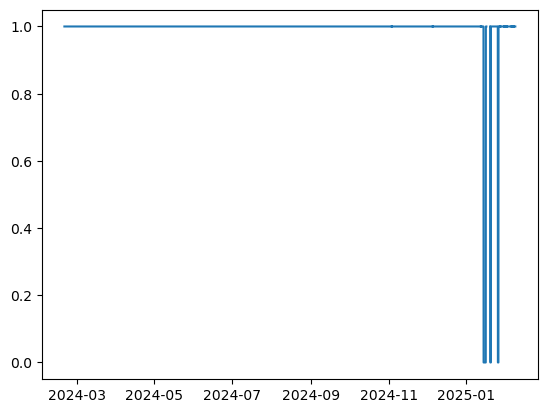

In [52]:
plt.plot(slowdata['PowerLIC'])
slowdata


In [28]:
print(slowdata.columns)
print(slowdata.attrs['units'])



Index(['RECORD', 'rmcutcdate', 'rmcutctime', 'rmclatitude', 'rmclongitude',
       'BattV_Min', 'PTemp_Avg', 'PowerSPC', 'PowerLIC', 'PowerHtr', 'WD1',
       'WD2', 'TA', 'RH', 'HS_Cor', 'HS_Qty', 'SBTempK', 'SFTempK', 'SWdown1',
       'SWup1', 'LWdown1', 'LWup1', 'SWdown2', 'SWup2', 'LWdown2', 'LWup2',
       'SWdn', 'SensorT', 'PF_FC4', 'WS_FC4', 'TIMESTAMP_wind', 'RECORD_wind',
       'WS1_Avg', 'WS1_Max', 'WS1_Std', 'WS2_Avg', 'WS2_Max', 'WS2_Std',
       'Ux_Avg', 'Uy_Avg', 'Uz_Avg', 'Ts_Avg', 'Ux_Std', 'Uy_Std', 'Uz_Std',
       'Ts_Std', 'n_Tot', 'csat_warnings', 'LI_CO2m_Avg', 'LI_H2Om_Avg',
       'LI_Pres_Avg', 'LI_CO2m_Std', 'LI_H2Om_Std', 'LI_Pres_Std'],
      dtype='object')
{'TIMESTAMP': 'TS', 'RECORD': 'RN', 'rmcutcdate': nan, 'rmcutctime': nan, 'rmclatitude': nan, 'rmclongitude': nan, 'BattV_Min': 'Volts', 'PTemp_Avg': 'degC', 'PowerSPC': nan, 'PowerLIC': nan, 'PowerHtr': nan, 'WD1': 'deg', 'WD2': 'deg', 'TA': 'degC', 'RH': '%', 'HS_Cor': 'm', 'HS_Qty': nan, 'SBTempK'

In [29]:
slowdata.attrs

{'units': {'TIMESTAMP': 'TS',
  'RECORD': 'RN',
  'rmcutcdate': nan,
  'rmcutctime': nan,
  'rmclatitude': nan,
  'rmclongitude': nan,
  'BattV_Min': 'Volts',
  'PTemp_Avg': 'degC',
  'PowerSPC': nan,
  'PowerLIC': nan,
  'PowerHtr': nan,
  'WD1': 'deg',
  'WD2': 'deg',
  'TA': 'degC',
  'RH': '%',
  'HS_Cor': 'm',
  'HS_Qty': nan,
  'SBTempK': nan,
  'SFTempK': nan,
  'SWdown1': 'W/m2',
  'SWup1': 'W/m2',
  'LWdown1': 'W/m2',
  'LWup1': 'W/m2',
  'SWdown2': 'W/m2',
  'SWup2': 'W/m2',
  'LWdown2': 'W/m2',
  'LWup2': 'W/m2',
  'SWdn': 'W/m2',
  'SensorT': 'degC',
  'PF_FC4': 'g/m2/s',
  'WS_FC4': 'km/h'},
 'units_wind': {'TIMESTAMP': 'TS',
  'RECORD': 'RN',
  'WS1_Avg': 'm/s',
  'WS1_Max': 'm/s',
  'WS1_Std': 'm/s',
  'WS2_Avg': 'm/s',
  'WS2_Max': 'm/s',
  'WS2_Std': 'm/s',
  'Ux_Avg': 'm/s',
  'Uy_Avg': 'm/s',
  'Uz_Avg': 'm/s',
  'Ts_Avg': 'degC',
  'Ux_Std': 'm/s',
  'Uy_Std': 'm/s',
  'Uz_Std': 'm/s',
  'Ts_Std': 'degC',
  'n_Tot': 'samples',
  'csat_warnings': 'samples',
  'LI_CO2

In [75]:
slowdata_cleaned = slowdata[['WD1', 'WD2', 'TA', 'RH', 'HS_Cor', 'HS_Qty', 'SFTempK', 'SWdown1', 'SWdown2', 'SWup1', 'SWup2', 'LWdown1', 'LWdown2', 'LWup1', 'LWup2', 'SWdn', 'PF_FC4', 'WS_FC4', 'WS1_Avg', 'WS2_Avg', 'WS1_Max', 'WS2_Max', 'WS1_Std', 'WS2_Std']]

# Add corresponding units from slowdata to attrs
for column in slowdata_cleaned.columns:
    if 'units' in slowdata.attrs and column in slowdata.attrs['units']:
        slowdata_cleaned[column].attrs['units'] = slowdata.attrs['units'][column]

slowdata_cleaned.loc[:, 'WS_FC4'] = slowdata_cleaned['WS_FC4'] / 3.6
slowdata_cleaned['WS_FC4'].attrs['units'] = 'm/s'
for var in ['SWdown1', 'SWdown2', 'SWup1', 'SWup2']:
    slowdata_cleaned.loc[:, var] = slowdata_cleaned[var].where(slowdata_cleaned[var] <= 1300, np.nan)
    slowdata_cleaned.loc[:, var] = slowdata_cleaned[var].where(slowdata_cleaned[var] >= 0, np.nan)
for var in ['LWdown1', 'LWdown2', 'LWup1', 'LWup2']:
    slowdata_cleaned.loc[:, var] = slowdata_cleaned[var].where(slowdata_cleaned[var] <= 400, np.nan)
    slowdata_cleaned.loc[:, var] = slowdata_cleaned[var].where(slowdata_cleaned[var] >= 10, np.nan)

Text(0.5, 0.92, 'SFC slowdata 2024-01-01 00:00-2025-01-01 00:00')

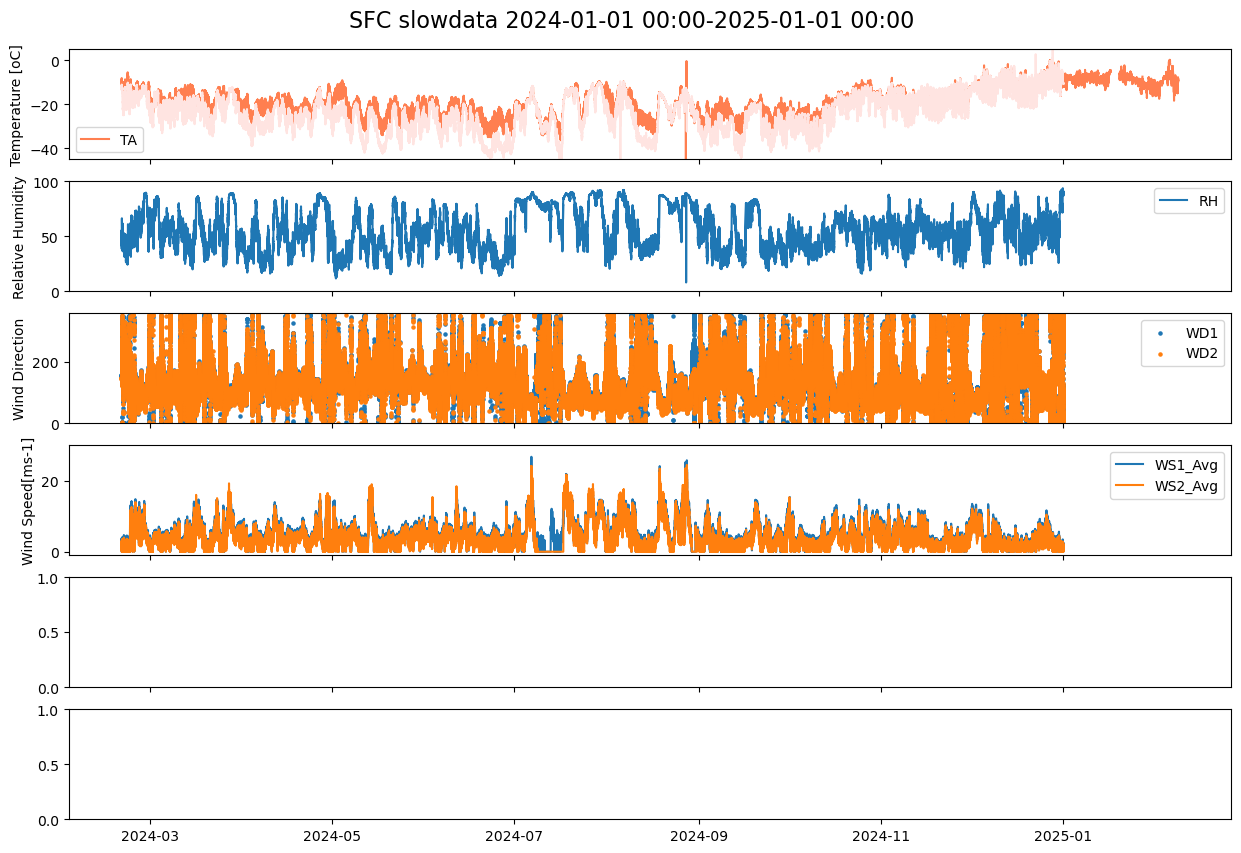

In [ ]:
# plot_SFC_slowdata(slowdata_cleaned, sensor, start, end)
start = '2024-01-01 00:00'
end = '2025-01-01 00:00'
# Plot TA, TS, RH, WD, WS, SWdown, SWup, LWdown, LWup 
fig, ax= plt.subplots(6,1, figsize=(15,10), sharex=True)

ax[0].plot(slowdata_cleaned['TA'], label='TA', color='coral')
ax[0].set_ylabel('Temperature [oC]')
ax[0].set_ylim(-45, 5)
ax[0].plot(slowdata_cleaned['SFTempK'][start:end]-273.15, label='TS', color='papayawhip', alpha=0.)
ax[0].legend()


ax[1].plot(slowdata_cleaned['RH'][start:end], label='RH')
ax[1].set_ylabel('Relative Humidity')
ax[1].legend()
ax[1].set_ylim(0, 100)

ax[2].scatter(slowdata_cleaned.loc[start:end].index, slowdata_cleaned['WD1'][start:end], label='WD1', s=5)
ax[2].scatter(slowdata_cleaned.loc[start:end].index, slowdata_cleaned['WD2'][start:end], label='WD2', s=5)
ax[2].set_ylabel('Wind Direction')
ax[2].legend()
ax[2].set_ylim(0, 360)

ax[3].plot(slowdata_cleaned['WS1_Avg'][start:end], label='WS1_Avg')
ax[3].plot(slowdata_cleaned['WS2_Avg'][start:end], label='WS2_Avg')
ax[3].set_ylabel('Wind Speed[ms-1]')
ax[3].legend()
ax[3].set_ylim(-1, 30)

# ax[4].plot(slowdata_cleaned[column_name], label=column_name)
# # ax[4].set_ylabel('Shortwave Radiation')
# ax[4].legend()
# ax[4].plot(slowdata_cleaned[column_name], label=column_name)
# ax[4].set_ylabel('Shortwave Radiation')
# ax[4].legend()
# ax[4].set_ylim(0,1200)
# ax[5].plot(slowdata_cleaned[column_name], label=column_name)
# # ax[5].set_ylabel('Longwave Radiation')
# ax[5].legend()
# ax[5].plot(slowdata_cleaned[column_name], label=column_name)
# ax[5].set_ylabel('Longwave Radiation')
# ax[5].legend()
# ax[5].set_ylim(50,400)


fig.suptitle(f'{sensor} slowdata {start}-{end}', y=0.92, fontsize=16)
# plt.savefig(f'./plots/{sensor}_slowdata.png')

In [96]:
slowdata_cleaned.loc[start:end].index

DatetimeIndex(['2024-02-20 08:21:00', '2024-02-20 08:22:00',
               '2024-02-20 08:23:00', '2024-02-20 08:24:00',
               '2024-02-20 08:25:00', '2024-02-20 08:26:00',
               '2024-02-20 08:27:00', '2024-02-20 08:28:00',
               '2024-02-20 08:29:00', '2024-02-20 08:30:00',
               ...
               '2024-12-31 23:51:00', '2024-12-31 23:52:00',
               '2024-12-31 23:53:00', '2024-12-31 23:54:00',
               '2024-12-31 23:55:00', '2024-12-31 23:56:00',
               '2024-12-31 23:57:00', '2024-12-31 23:58:00',
               '2024-12-31 23:59:00', '2025-01-01 00:00:00'],
              dtype='datetime64[ns]', name='TIMESTAMP', length=454540, freq='min')

(-50.0, 20.0)

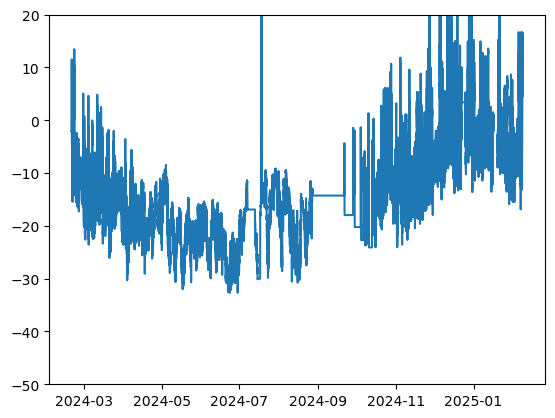

In [77]:
plt.plot(slowdata['SensorT'])
plt.ylim(-50, 20)

(<Figure size 1500x1000 with 4 Axes>,
 array([<Axes: ylabel='Wind Speed Ux'>, <Axes: ylabel='Wind Speed Uy'>,
        <Axes: ylabel='Wind Speed Uz'>, <Axes: ylabel='Temperature'>],
       dtype=object))

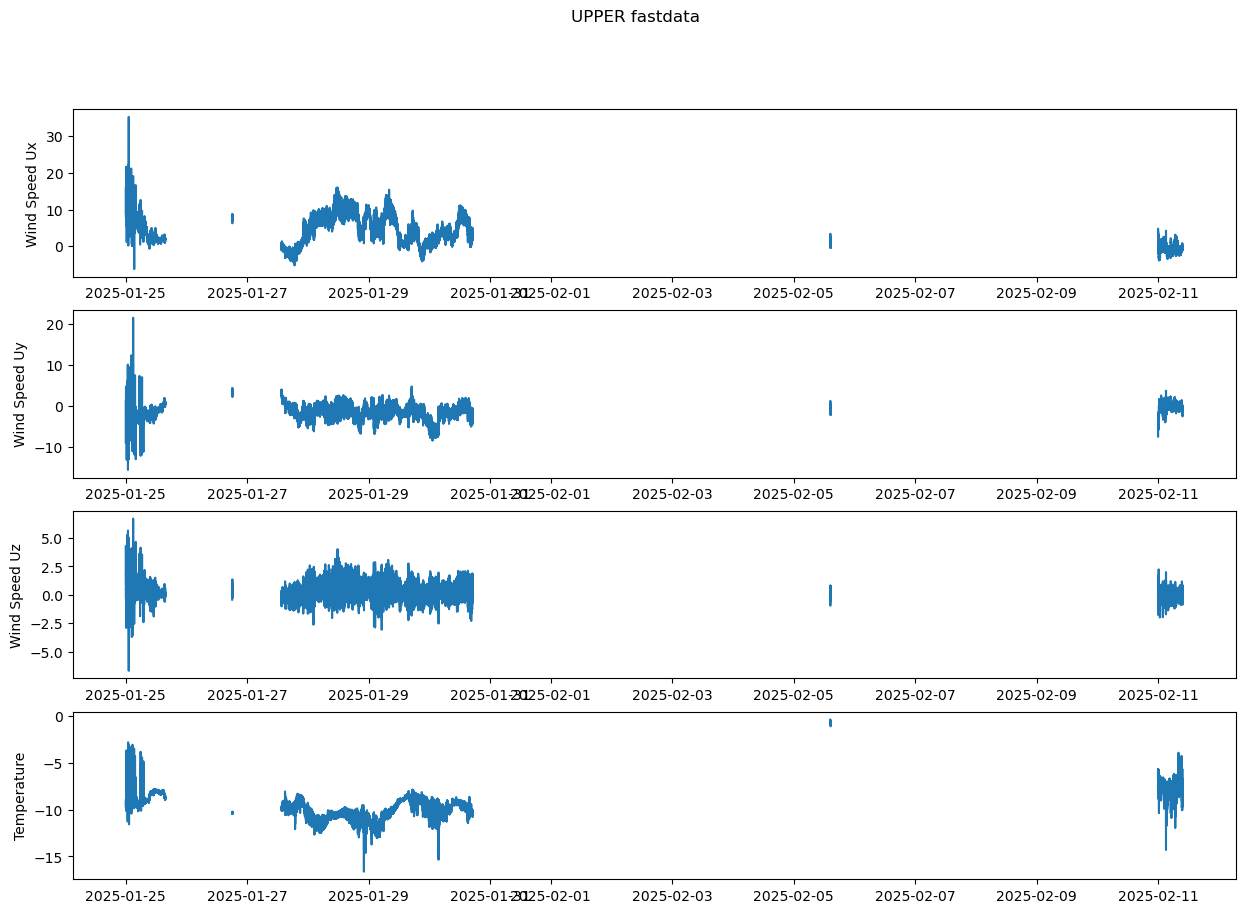

In [5]:
plot_fast_data(fastdata, sensor)

In [10]:
slowdata

NameError: name 'slowdata' is not defined

In [ ]:
"""DESPIKE, PLOT, AND SAVE"""
despiked_fastdata=despike_fast_MAD(fastdata, slowdata, plim, sensor, calibration_coefficients=calibration_coefficients, plot_despike=True)
despike_fast_MAD()
"""DOUBLE ROTATE THE DATA TO ALIGN WIND VECTOR WITH X-AXIS"""
fastdata_rot, angles=double_rotation(despiked_fastdata)


# """ APPLY MRD TO FIND AVERAGING  TIMESCALE"""

# M=16
# (mrd_x, mrd_data, time_middle)=completemrd(fastdata_rot, 'Uz', 'Ts', M, shift=round(int(0.1 * 2**M)), plot=True)

In [ ]:
fastdata

NameError: name 'fastdata' is not defined

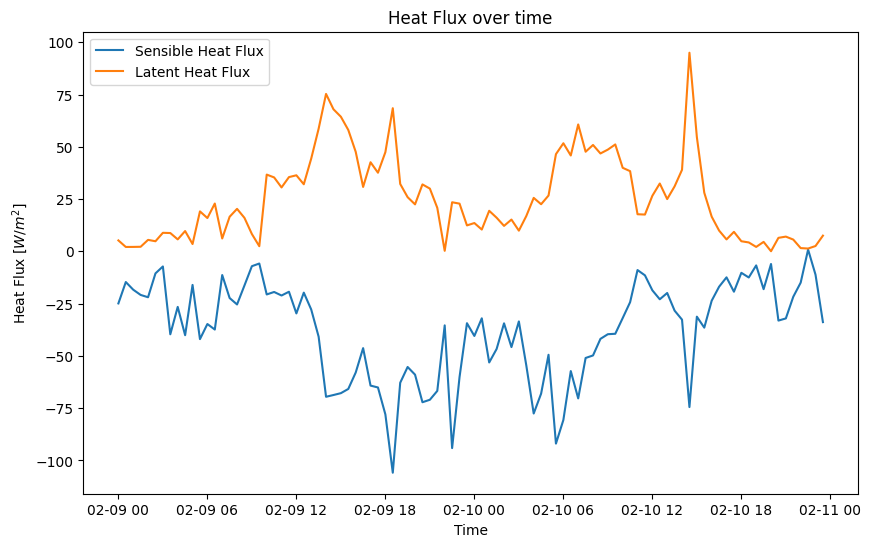

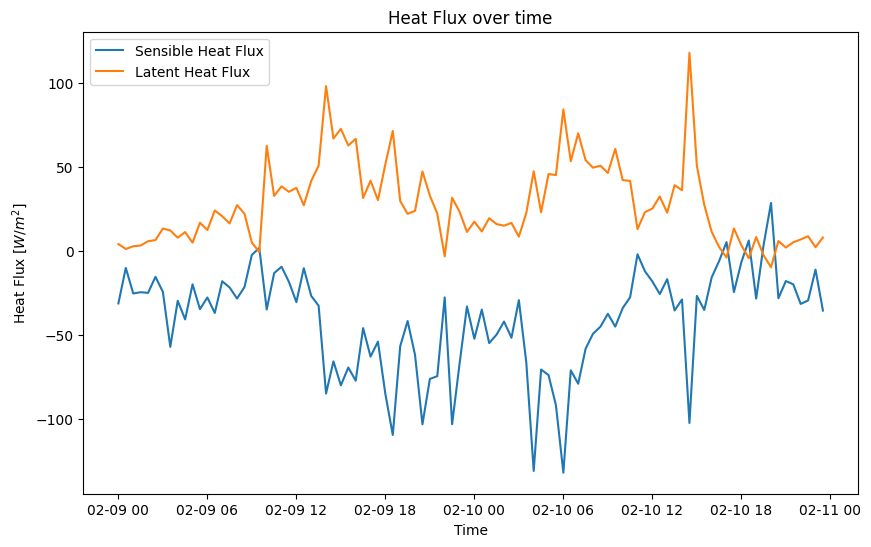

In [304]:
""" CHECK HEATFLUX QUICKLY WITH AVERAGING INTERVAL FOM MRD"""
df_heatflux=check_heat_flux(fastdata_rot, '3min', plot=True)
df_heatflux=check_heat_flux(fastdata_rot, '15min', plot=True)

In [288]:
fastdata.attrs['units']

{'TIMESTAMP': 'TS',
 'RECORD': 'RN',
 'Ux_26m': 'm/s',
 'Uy_26m': 'm/s',
 'Uz_26m': 'm/s',
 'Ts_26m': 'degC',
 'LI_CO2m_26m': 'mmol/m3',
 'LI_H2Om_26m': 'mmol/m3',
 'LI_Pres_26m': 'kPa',
 'LI_diag_26m': 'unitless',
 'diag_csat_26m': 'none'}

In [281]:
fastdata_rot

,RECORD,Ux,Uy,Uz,Ts,LI_CO2m,LI_H2Om,LI_Pres,LI_diag,diag_csat
TIMESTAMP,,,,,,,,,,
2025-02-09 00:00:00.000,2294617,4.765987,0.228978,1.080463,-11.409060,16.16549,72.65046,82.29378,248.0,0
2025-02-09 00:00:00.100,2294618,4.473337,0.342521,1.040724,-11.452670,16.16411,72.47697,82.29378,248.0,0
2025-02-09 00:00:00.200,2294619,4.570207,0.228653,0.935886,-11.380000,16.16500,72.57101,82.32256,248.0,0
2025-02-09 00:00:00.300,2294620,4.508776,0.282818,0.934783,-11.402620,16.16287,72.69469,82.32528,248.0,0
2025-02-09 00:00:00.400,2294621,4.611115,0.470315,0.961204,-11.388090,16.16385,72.60616,82.29378,248.0,0
...,...,...,...,...,...,...,...,...,...,...
2025-02-11 00:00:59.500,4023216,4.896393,2.717614,0.491949,-5.783051,16.02427,65.90383,82.81492,248.0,0
2025-02-11 00:00:59.600,4023217,4.746661,2.592127,0.469766,-5.817291,16.02364,65.98152,82.81784,248.0,0
2025-02-11 00:00:59.700,4023218,4.933404,2.806572,0.554809,-5.814056,16.02207,66.01935,82.81784,248.0,0


In [270]:
fastdata_rot.Uz.isna().sum()   
blockdur='30min'
blockdur = pd.Timedelta(blockdur)
freq = (fastdata.index[1] - fastdata.index[0]).total_seconds()
blockduridx = int(blockdur / pd.Timedelta(f'{freq}s'))
blockduridx*0.01

180.0

In [26]:
fastdata_rot.to_csv(f'/home/engbers/Documents/PhD/Data/EC_despiked/{folder_name}/fast_{sensor}_{pd.Timestamp(start).strftime('%Y-%m-%d')}_{pd.Timestamp(end).strftime('%Y-%m-%d')}.csv')

/home/engbers/Documents/Github/DataProcessingScripts/EC/Func_MRFD.py:65: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gaps = pd.concat([gaps, pd.DataFrame({'idx_before_gap': [len(data)],


MRD for DataFrame
Number of gaps: 1


 98%|█████████▊| 1696968/1728600 [04:31<00:05, 6256.52it/s]


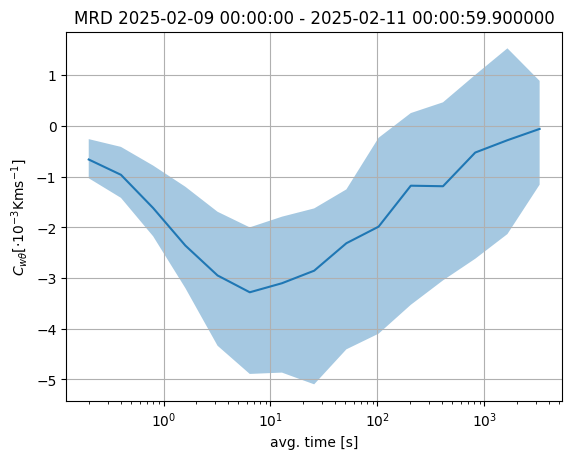

In [305]:
M=15
(mrd_x_1, mrd_data_1, time_middle_1)=completemrd(fastdata_rot, 'Uz', 'Ts', M, shift=round(int(0.1 * 2**M)), plot=True)


/tmp/ipykernel_1793656/983133572.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


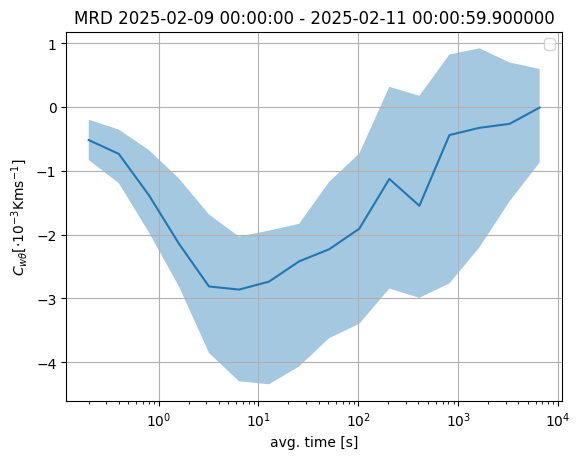

In [ ]:
fig, ax = plt.subplots()

# Set title dynamically using first and last time values from evaldf1
ax.set_title(f"MRD {fastdata_rot.index[0]} - {fastdata_rot.index[-1]}")
ax.set_xlabel("avg. time [s]")
ax.set_ylabel(r"$C_{w\theta} [\cdot 10^{-3} \mathrm{Kms^{-1}}]$")
ax.grid(True)

ax.set_xscale("log")

# Plot the median MRD values
ax.plot(np.array(seconds_array) ,(np.nanmedian(mrd_data_1, axis=1))*1000)

# Fill between the quantiles
ax.fill_between(np.array(seconds_array), 
                np.nanquantile(mrd_data_1, 0.25, axis=1) * 1000, 
                np.nanquantile(mrd_data_1, 0.75, axis=1) * 1000, 
                alpha=0.4)

ax.legend()
plt.show()


In [30]:
sensor='SFC'
start='2025-02-01 00:00'
end='2025-02-12 00:00'

"""GET SENSOR INFO"""
plim, calibration_coefficients, heights, folder_name = get_sensor_info(sensor)
"""READ FAST AND SLOW DATA from folder"""
folder=f'/home/engbers/Documents/PhD/Data/EC/{folder_name}/'
fastdata=read_data(folder, 'fast', sensor, start, end)

folder=f'/home/engbers/Documents/PhD/Data/EC/{folder_name}/'
slowdata=read_data(folder, 'slow', sensor, start, end)

Heights dictionary: {}
